In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import utils_fid as uf
import torch
from sklearn.preprocessing import scale
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
model = torch.load('../classificador/1707962574001-resnext29_8_64_sgd_plateau_bs2_lr1.0e-02_wd1.0e-02-best-loss.pth')

In [4]:
gen_data = uf.get_embedding(model, '../data/generated/', class_c='BOAFAB', sample_size=10)
real_data = uf.get_embedding(model, '../data/test/', class_c='BOAFAB', sample_size=1000)

 90%|█████████ | 9.00/10.0 [00:01<00:00, 4.50audios/s]
100%|██████████| 250/250 [00:18<00:00, 13.5audios/s] 


In [8]:
import numpy as np

data = np.vstack((
    real_data,
    gen_data
))

gruper = ['Real'] * len(real_data) + ['Generado'] * len(gen_data)

c:\Users\snung\miniconda3\envs\myenv\Lib\site-packages\sklearn\preprocessing\_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\snung\miniconda3\envs\myenv\Lib\site-packages\sklearn\preprocessing\_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


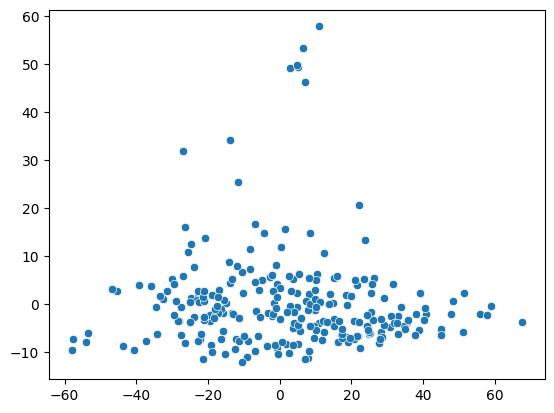

In [11]:
scaled_real_data = scale(data)

pca = PCA(n_components=2)
pca.fit(scaled_real_data)

data_transformed = pca.transform(scaled_real_data)

sns.scatterplot(
    x=data_transformed[:, 0],
    y=data_transformed[:, 1],
)

plt.show()

In [45]:
real_data.shape

(250, 1024)

In [44]:
gen_data.shape

(10, 1024)

In [18]:
scaled_real_data = scale(real_data, axis=0)

c:\Users\snung\miniconda3\envs\myenv\Lib\site-packages\sklearn\preprocessing\_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\snung\miniconda3\envs\myenv\Lib\site-packages\sklearn\preprocessing\_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [32]:
pca = PCA(n_components=2)
pca.fit(scaled_real_data)

PCA(n_components=2)

In [34]:
# Transform the data
data_transformed = pca.transform(scaled_real_data)

<Axes: >

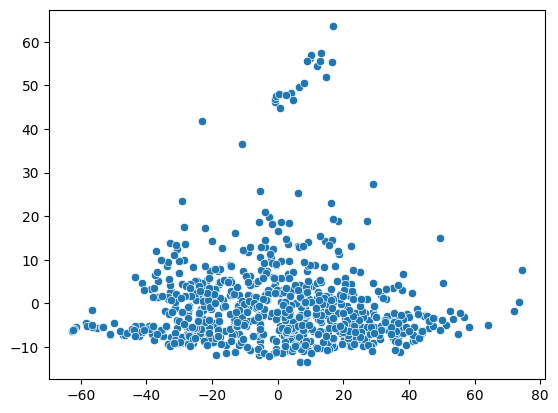

In [37]:
sns.scatterplot(
    x=data_transformed[:, 0],
    y=data_transformed[:, 1],
)
